In [1]:
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


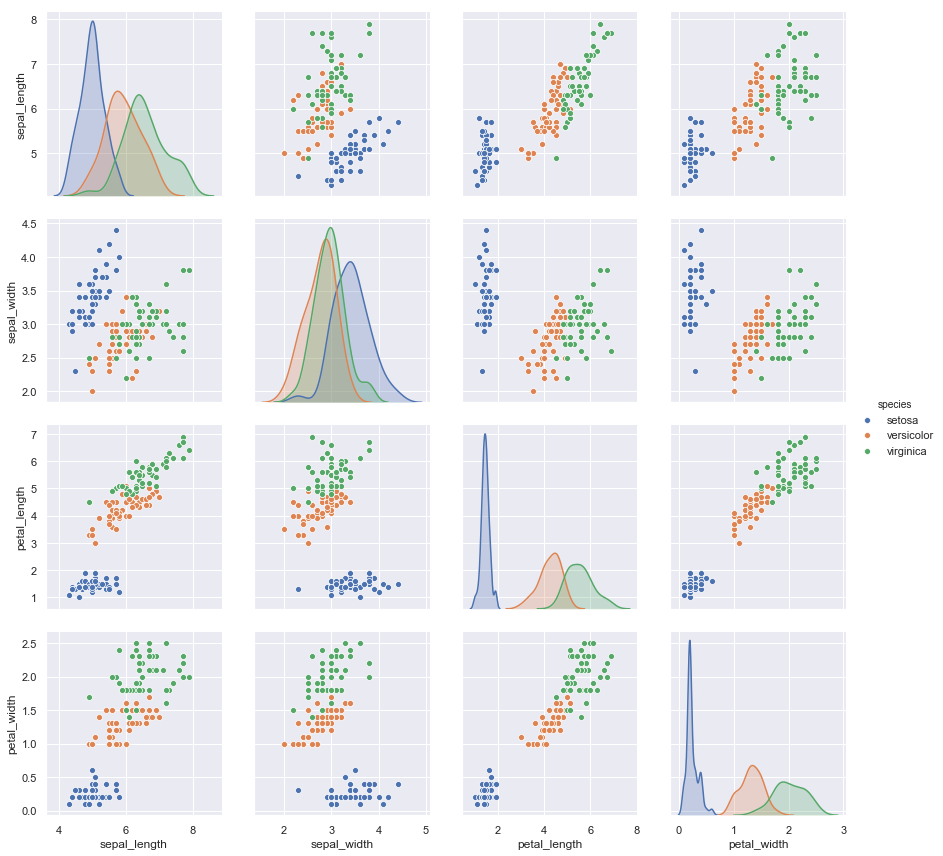

In [3]:
sns.pairplot(iris,hue='species',height=3);

In [4]:
X_iris = iris.drop('species',axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

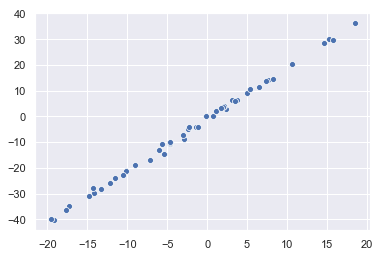

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.randn(50)
y = 2 * x - 1 + rng.randn(50)
sns.scatterplot(x,y);

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
model.coef_

array([2.01030756])

In [12]:
model.intercept_

-0.9589782612132041

In [13]:
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

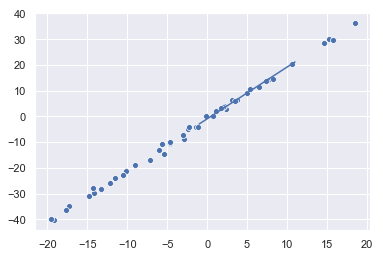

In [14]:
sns.scatterplot(x,y)
sns.lineplot(xfit,yfit);

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [17]:
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

In [19]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

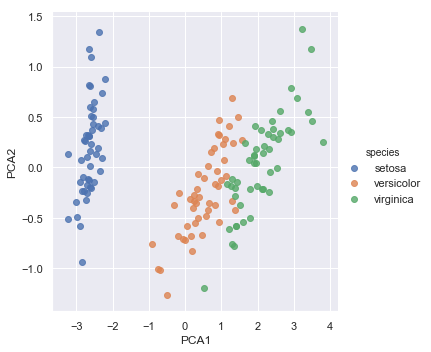

In [20]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False);

In [21]:
from sklearn import mixture

In [22]:
model = mixture.GaussianMixture?

In [ ]:
model = mixture.GaussianMixture

In [23]:
model = mixture.GaussianMixture(n_components=3)
model.fit(X_iris)
y_gm = model.predict(X_iris)

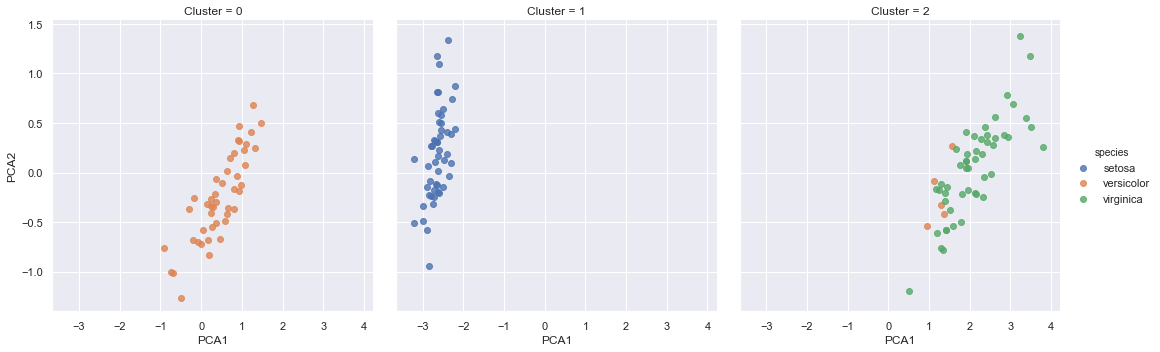

In [24]:
iris['Cluster'] = y_gm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='Cluster',fit_reg=False);

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

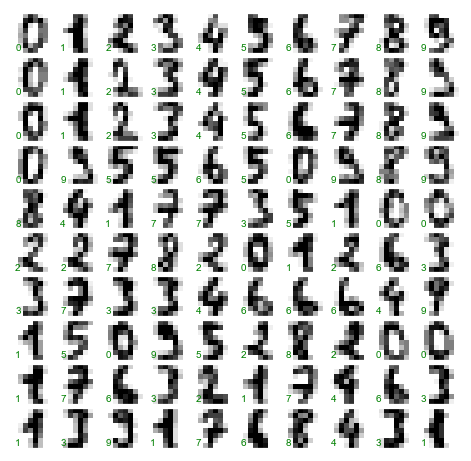

In [26]:
fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat): #10x10, first 100 images
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')       #images
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')#small text with number

In [27]:
X = digits.data
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape

(1797,)

In [29]:
from sklearn import manifold

In [30]:
iso = manifold.Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

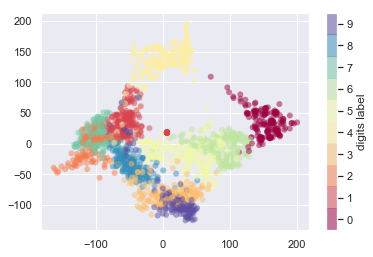

In [31]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.colorbar(label='digits label',ticks=range(10))
plt.clim(-0.5,9.5);

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0)

In [36]:
from sklearn import naive_bayes

In [37]:
model = naive_bayes.GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

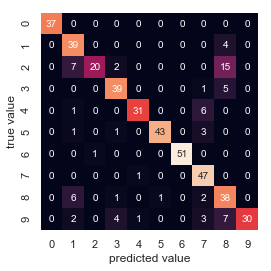

In [39]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

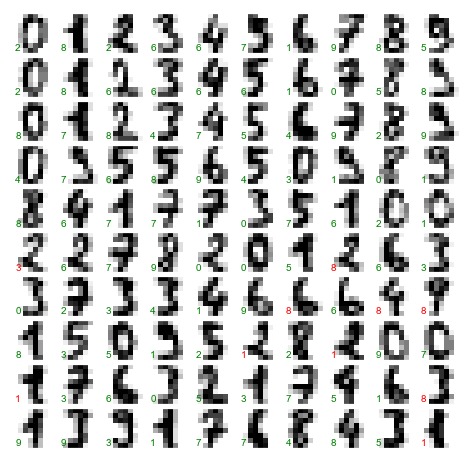

In [41]:
fig,axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i]==y_model[i]) else 'red') #if recognized number same as source - green, else - red

In [45]:
!git status

"git" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
